## Центральная предельная теорема своими руками на примере
### Задача
В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

### Я выбрал, Непрерывного распределения Рэлея
Которая существует в библиотеке scipy.stats (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rayleigh.html)

Более подробно можете узнать здесь: https://ru.wikipedia.org/wiki/Распределение_Рэлея


Импортируем необходимые для работы библиотек

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
from math import sqrt, pi
%matplotlib inline # добавим эту строчку, чтобы не писать .show() каждый раз при выводе графика

UsageError: unrecognized arguments: # добавим эту строчку, чтобы не писать .show() каждый раз


### Генерация выборки объёма 1000
Сгенерируем выборку из 1000 значений случайной величины из распределения Рэлея:

In [8]:
rayleigh_rv = sts.rayleigh(loc = 0, scale = 1) 
temp = rayleigh_rv.rvs(1000) # Shift + Tab = show details

### Построим теоретическую и эмпирическую функции распределения

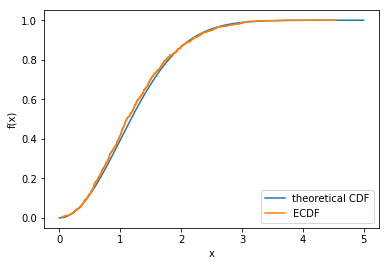

In [12]:
# Зададим ось x
x = np.linspace(0, 5, 1000) # start = 0, stop = 5, num = 1000

# Теоретическая функция распределения:
cdf = rayleigh_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# Эмпирическая функция распределения (по нашей выборке объёма 1000):
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(temp)
plt.step(ecdf.x, ecdf.y, label = 'ECDF')

plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend(loc = 'lower right')

Из за достаточно большого объёма выборки можем убедиться, что эмпирическая функция довольно "близка" к теоретической. Как показана на графике выше 

### Построим гистограмму выборки и график теоретической функции плотности распределения нашей случайной величины:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'x')

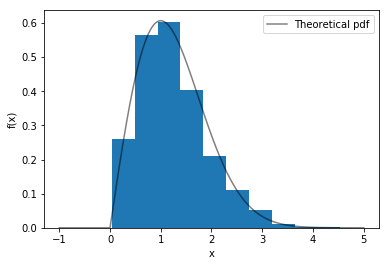

In [17]:
# Гистограмма выборки:
plt.hist(temp, normed = True)

# Теоретическая плотность распределения
x = np.linspace(-1, 5, 1000) # start = -1, stop = 5, num = 1000
pdf = rayleigh_rv.pdf(x)
plt.plot(x, pdf, label = 'Theoretical pdf', alpha = 0.5, color = 'black')

plt.legend()
plt.ylabel('f(x)')
plt.xlabel('x')

### Применение центральной предельной теоремы

Для каждого значения n - объёма выборки (2, 5, 10, 20, 30, 50) - генерировать 1000 выборок объёма n, для каждой считать выборочное среднее и строить гистограммы распределений выборочных средних для каждого n, а поверх гистограмм строить графики плотности вероятности для нормальных распределений, которые аппроксимируют(приближает) выборочные средние при различных n по ЦПТ:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


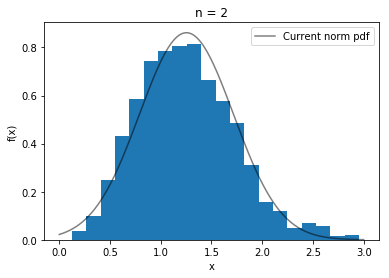

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


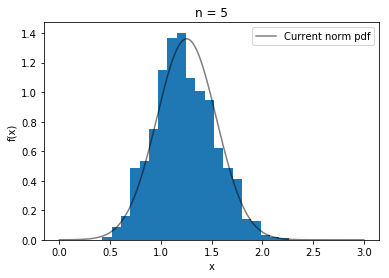

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


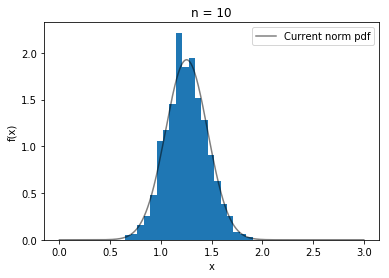

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


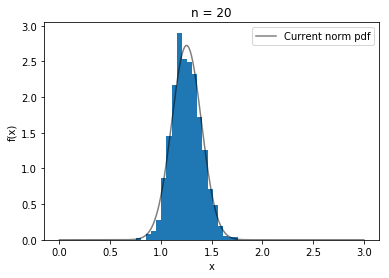

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


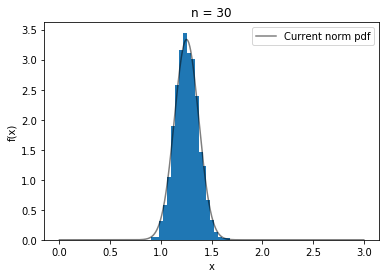

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


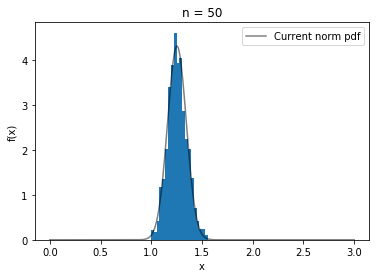

In [24]:
n_list = [2, 5, 10, 20, 30, 50] # запишем наши n в лист
sigma = 1 # default

# Теоретические среднее (мат. ожидание) и дисперсия распределния Рэлея
th_mean = sqrt(pi / 2) * sigma
th_disp = 2 - pi / 2

for n in n_list:
    sample_list = []
    for i in range(0, 1001):
        tmp_sample = rayleigh_rv.rvs(n)
        cur_mean = sum(tmp_sample) / float(n)
        sample_list.append(cur_mean)

    plt.hist(sample_list, bins=20, normed=True)

    # Теперь строим график плотности вероятности нормального распределения (по ЦПТ)
    norm_rv = sts.norm(th_mean, sqrt(th_disp / n))
    x = np.linspace(0, 3, 1000)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label = 'Current norm pdf', alpha = 0.5, color = 'black')

    plt.title('n = {}'.format(n))
    plt.legend(loc = "upper right")
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.show()

### Выводы по результатам задания
Мы убедились, что с ростом n точность нормальной аппроксимации увеличивается, в чём нам помогла центральная предельная теорема.
